<a href="https://colab.research.google.com/github/sagar9926/FlowerClassification/blob/master/Copy_of_Flower_category_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab library to upload files to notebook
#from google.colab import files

# Install Kaggle library
!pip install  kaggle

from keras import regularizers
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
#print(os.listdir("../input/flower-recognition-he/data"))
from tqdm import tqdm
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
cd ..

/


In [3]:
cd content

/content


In [4]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"agrawalsagar178","key":"7604784a8151ff52ac7f784fa20d7729"}'}

In [5]:
!ls

 data			    'kaggle (1).json'   sample_data
 flower-recognition-he.zip   kaggle.json


In [6]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Aug  5 10:34 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download -d rednivrug/flower-recognition-he -p /content

100% 901M/905M [00:11<00:00, 95.0MB/s]
100% 905M/905M [00:12<00:00, 78.9MB/s]


In [10]:
# Unzip the data
!unzip flower-recognition-he.zip

Archive:  flower-recognition-he.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
   creating: data/test/
  inflating: data/test/.DS_Store     
  inflating: data/test/18540.jpg     
  inflating: data/test/18541.jpg     
  inflating: data/test/18542.jpg     
  inflating: data/test/18543.jpg     
  inflating: data/test/18544.jpg     
  inflating: data/test/18545.jpg     
  inflating: data/test/18546.jpg     
  inflating: data/test/18547.jpg     
  inflating: data/test/18548.jpg     
  inflating: data/test/18549.jpg     
  inflating: data/test/18550.jpg     
  inflating: data/test/18551.jpg     
  inflating: data/test/18552.jpg     
  inflating: data/test/18553.jpg     
  inflating: data/test/18554.jpg     
  inflating: data/test/18555.jpg     
  inflating: data/test/18556.jpg     
  inflating: data/test/18557.jpg     
  inflating: data/test/18558.jpg     
  inflating: data/test/18559.jpg     
  inflating: data/test/18560.jpg     
  inflating: data/test/1

In [11]:
# Let's check the labels
train_category = pd.read_csv("data/train.csv")
train_category.category.value_counts()

51     582
77     567
46     441
73     438
89     414
74     387
81     375
94     366
88     348
78     309
83     297
43     294
41     288
95     288
75     270
58     258
82     252
60     246
56     246
76     243
37     243
80     237
65     231
72     216
53     210
44     210
23     207
96     207
50     207
12     198
      ... 
64     117
61     114
19     111
15     111
49     111
100    111
13     111
14     108
102    108
93     105
9      105
33     105
32     102
6      102
10     102
35      99
67      96
24      96
39      93
79      93
25      93
26      93
16      93
34      90
3       90
21      90
7       90
1       90
27      90
45      90
Name: category, Length: 102, dtype: int64

In [12]:
#%cd content
%cd data
!ls

/content/data
sample_submission.csv  test  test.csv  train  train.csv


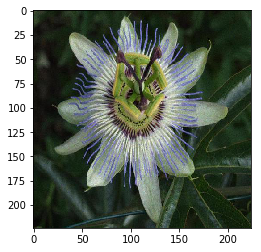

In [13]:

img = image.load_img('../data/train/'+train_category['image_id'][0].astype('str')+'.jpg', target_size=(224,224,1))
imgplot = plt.imshow(img)

In [0]:
#Next, we will read all the training images, store them in a list, 
#and finally convert #that list into a numpy array.

train_image = []
for i in tqdm(range(train_category.shape[0])):
    img = image.load_img('../data/train/'+train_category['image_id'][i].astype('str')+'.jpg', target_size=(224,224,1))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)




 59%|█████▉    | 10921/18540 [01:31<4:03:35,  1.92s/it]
KeyboardInterrupt



In [0]:
L  = list(train_category.category)

In [0]:
X[0]

array([[[0.21176471, 0.25882354, 0.16470589],
        [0.21568628, 0.24313726, 0.17254902],
        [0.14509805, 0.19607843, 0.1254902 ],
        ...,
        [0.11372549, 0.17254902, 0.09019608],
        [0.14509805, 0.21960784, 0.13333334],
        [0.13333334, 0.20784314, 0.12156863]],

       [[0.17254902, 0.24705882, 0.16078432],
        [0.13725491, 0.21176471, 0.13725491],
        [0.09019608, 0.14901961, 0.07450981],
        ...,
        [0.11764706, 0.16470589, 0.08627451],
        [0.14117648, 0.21568628, 0.12941177],
        [0.11372549, 0.1882353 , 0.10196079]],

       [[0.20784314, 0.26666668, 0.14509805],
        [0.11764706, 0.18039216, 0.07843138],
        [0.07058824, 0.07450981, 0.04313726],
        ...,
        [0.07450981, 0.14117648, 0.06666667],
        [0.10588235, 0.18039216, 0.09411765],
        [0.1764706 , 0.27058825, 0.1764706 ]],

       ...,

       [[0.05882353, 0.06666667, 0.04705882],
        [0.05490196, 0.0627451 , 0.04313726],
        [0.07058824, 0

In [0]:
X.shape

(18540, 50, 50, 3)

In [0]:
y=train_category['category'].values
y = to_categorical(y)

In [0]:
y.shape

(18540, 103)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25,stratify = L )

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,horizontal_flip = True,vertical_flip = True)
datagen.fit(X_train)

val_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
val_datagen.fit(X_train)


# demonstrate effect on entire training dataset
train_iterator = datagen.flow(X_train, y_train, batch_size=256, shuffle=False) #what is the use of shuffle
val_iterator = val_datagen.flow(X_test, y_test, batch_size=64, shuffle=False)

In [0]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(50, 50, 3),kernel_regularizer=regularizers.l2(0.0001))) #50,3
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0002),border_mode='same')) #50,5
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0002),border_mode='same')) #50,7
model1.add(Activation('relu'))
model1.add(BatchNormalization())


model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Convolution2D(32, 1, 1))
###################################################################################

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0002), border_mode='same')) #25,14
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0002),border_mode='same')) #25,16
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,border_mode='same')) #25,18
model1.add(Activation('relu'))
model1.add(BatchNormalization())


model1.add(MaxPooling2D(pool_size=(2, 2))) #12,36
model1.add(Dropout(0.25))

model1.add(Convolution2D(32, 1, 1))

###########################################################################

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0002), border_mode='same')) #12,38
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0002),border_mode='same')) #12,40
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(512, 3, 3,kernel_regularizer=regularizers.l2(0.0002),border_mode='same')) #12,42
model1.add(Activation('relu'))
model1.add(BatchNormalization())


model1.add(MaxPooling2D(pool_size=(2, 2)))#84
model1.add(Dropout(0.25))

model1.add(Convolution2D(32, 1, 1))


################################################################################
           
model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0002), border_mode='same')) #6,86
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(512, 3, 3,kernel_regularizer=regularizers.l2(0.0002),border_mode='same')) #6,88
model1.add(Activation('relu'))
model1.add(BatchNormalization())
         

model1.add(Convolution2D(103, 1, 1))

model1.add(AveragePooling2D(pool_size = (6,6)))

model1.add(Flatten())


model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(50, 50, 3..., kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., paddin

In [0]:
from keras.models import Sequential,Model, Input
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D , DepthwiseConv2D, concatenate
model_input = Input(shape=(50, 50, 3))

#block1
x1 = Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(model_input)
x1 = BatchNormalization()(x1)

# for separable convolution , i am using 3x1 and 1x3 normal convolution one after the other.
x1 = Conv2D(64, (3, 1), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (1, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x1)
x1 = BatchNormalization()(x1)

x1 = MaxPooling2D((2,2))(x1)
x1 = Dropout(0.2)(x1)

# Bottleneck 1x1 to reduce params
x1 = Conv2D(32, (1, 1), activation='relu')(x1)


#Grouped Conv block (3,3) & (5,5)
x2 = Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x1)
x2 = BatchNormalization()(x2)

x3 = Conv2D(128, (5, 5), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x1)
x3 = BatchNormalization()(x3)

x31 = Conv2D(128, (7, 7), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x1)
x31 = BatchNormalization()(x31)


x4 = concatenate([x2,x3,x31])

x4 = MaxPooling2D((2,2))(x4)
x4 = Dropout(0.3)(x4)

# Bottleneck 1x1 to reduce params
x4 = Conv2D(32, (1, 1), activation='relu')(x4)

#Grouped Conv block Conv2d(3,3) dilation rate (1,1) & Conv2d(3,3) with dilation rate (2,2)
x5 = Conv2D(256, (3, 3), dilation_rate=(1, 1), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x4)
x5 = BatchNormalization()(x5)

x6 = Conv2D(256, (3, 3), dilation_rate=(2, 2), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x4)
x6 = BatchNormalization()(x6)

x61 = Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x4)
x61 = BatchNormalization()(x61)


x7 = concatenate([x5,x6,x61])

# Depthwise convolution is actually achieved using SeparableConv2D

x8 = SeparableConv2D(512,(3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0002))(x7)
x8 = BatchNormalization()(x8)

x8 = MaxPooling2D((2,2))(x8)
x8 = Dropout(0.5)(x8)

# Bottleneck 1x1 to reduce params
x8 = Conv2D(256, (1, 1), activation='relu')(x8)
x8 = AveragePooling2D(4,4)(x8)
x8= Flatten()(x8)
d1 = Dense(103)(x8)

x8 = Activation(activation='softmax')(d1)

model = Model(model_input, x8, name='cnn')

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.models import Sequential,Model, Input
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D , DepthwiseConv2D, concatenate
model_input = Input(shape=(50, 50, 3))

#block1
x1 = Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(model_input)
x1 = BatchNormalization()(x1)

# for separable convolution , i am using 3x1 and 1x3 normal convolution one after the other.
x1 = Conv2D(64, (5, 5), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x1 = BatchNormalization()(x1)

x1 = Conv2D(128, (7, 7), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x1 = BatchNormalization()(x1)

x1 = MaxPooling2D((2,2))(x1)
x1 = Dropout(0.2)(x1)

# Bottleneck 1x1 to reduce params
x1 = Conv2D(32, (1, 1), activation='relu')(x1)


#Grouped Conv block (3,3) & (5,5)
x2 = Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x2 = BatchNormalization()(x2)

x3 = Conv2D(128, (5, 5), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x3 = BatchNormalization()(x3)

x31 = Conv2D(128, (7, 7), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x31 = BatchNormalization()(x31)


x4 = concatenate([x2,x3,x31])

x4 = MaxPooling2D((2,2))(x4)
x4 = Dropout(0.3)(x4)

# Bottleneck 1x1 to reduce params
x4 = Conv2D(32, (1, 1), activation='relu')(x4)

#Grouped Conv block Conv2d(3,3) dilation rate (1,1) & Conv2d(3,3) with dilation rate (2,2)
x5 = Conv2D(256, (3, 3), dilation_rate=(1, 1), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x5 = BatchNormalization()(x5)

x6 = Conv2D(256, (3, 3), dilation_rate=(2, 2), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x6 = BatchNormalization()(x6)

x61 = Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x61 = BatchNormalization()(x61)


x7 = concatenate([x5,x6,x61])

# Depthwise convolution is actually achieved using SeparableConv2D

x8 = SeparableConv2D(512,(3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x7)
x8 = BatchNormalization()(x8)

x8 = MaxPooling2D((2,2))(x8)
x8 = Dropout(0.5)(x8)

# Bottleneck 1x1 to reduce params
x8 = Conv2D(256, (1, 1), activation='relu')(x8)
x8 = AveragePooling2D(4,4)(x8)
x8= Flatten()(x8)
d1 = Dense(103)(x8)

x8 = Activation(activation='softmax')(d1)

model = Model(model_input, x8, name='cnn')

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#91

from keras.models import Sequential,Model, Input
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D , DepthwiseConv2D, concatenate
model_input = Input(shape=(224, 224, 3))

#block1
x1 = Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(model_input)
x1 = BatchNormalization()(x1)

# for separable convolution , i am using 3x1 and 1x3 normal convolution one after the other.
x1_1 = Conv2D(64, (5, 5), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(model_input)
x1_1 = BatchNormalization()(x1_1)

x1_2 = Conv2D(128, (7, 7), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(model_input)
x1_2 = BatchNormalization()(x1_2)

x1_3 = concatenate([x1,x1_1,x1_2])

x1_3 = MaxPooling2D((2,2))(x1_3)
x1_3 = Dropout(0.2)(x1_3)

# Bottleneck 1x1 to reduce params
x1_3 = Conv2D(64, (1, 1), activation='relu')(x1_3)


#Grouped Conv block (3,3) & (5,5)
x2 = Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1_3)
x2 = BatchNormalization()(x2)

x3 = Conv2D(128, (5, 5), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1_3)
x3 = BatchNormalization()(x3)

x31 = Conv2D(128, (7, 7), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1_3)
x31 = BatchNormalization()(x31)


x4 = concatenate([x2,x3,x31])

x4 = MaxPooling2D((2,2))(x4)
x4 = Dropout(0.3)(x4)

# Bottleneck 1x1 to reduce params
x4 = Conv2D(64, (1, 1), activation='relu')(x4)

#Grouped Conv block Conv2d(3,3) dilation rate (1,1) & Conv2d(3,3) with dilation rate (2,2)
x5 = Conv2D(256, (3, 3), dilation_rate=(1, 1), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x5 = BatchNormalization()(x5)

x6 = Conv2D(256, (3, 3), dilation_rate=(2, 2), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x6 = BatchNormalization()(x6)

x61 = Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x61 = BatchNormalization()(x61)


x7 = concatenate([x5,x6,x61])

# Depthwise convolution is actually achieved using SeparableConv2D

x8 = SeparableConv2D(512,(3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x7)
x8 = BatchNormalization()(x8)

x8 = MaxPooling2D((2,2))(x8)
x8 = Dropout(0.5)(x8)

# Bottleneck 1x1 to reduce params
x8 = Conv2D(256, (1, 1), activation='relu')(x8)
x8 = AveragePooling2D(6,6)(x8)
x8= Flatten()(x8)
d1 = Dense(103)(x8)

x8 = Activation(activation='softmax')(d1)

model = Model(model_input, x8, name='cnn')

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#90

from keras.models import Sequential,Model, Input
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D , DepthwiseConv2D, concatenate
model_input = Input(shape=(224, 224, 3))

#block1
x1 = Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(model_input)
x1 = BatchNormalization()(x1)

# for separable convolution , i am using 3x1 and 1x3 normal convolution one after the other.
x1 = Conv2D(64, (5, 5), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x1 = BatchNormalization()(x1)

x1 = Conv2D(128, (7, 7), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x1 = BatchNormalization()(x1)

x1 = MaxPooling2D((2,2))(x1)
x1 = Dropout(0.2)(x1)

# Bottleneck 1x1 to reduce params
x1 = Conv2D(32, (1, 1), activation='relu')(x1)


#Grouped Conv block (3,3) & (5,5)
x2 = Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x2 = BatchNormalization()(x2)

x3 = Conv2D(128, (5, 5), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x3 = BatchNormalization()(x3)

x31 = Conv2D(128, (7, 7), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x31 = BatchNormalization()(x31)


x4 = concatenate([x2,x3,x31])

x4 = MaxPooling2D((2,2))(x4)
x4 = Dropout(0.3)(x4)

# Bottleneck 1x1 to reduce params
x4 = Conv2D(32, (1, 1), activation='relu')(x4)

#Grouped Conv block Conv2d(3,3) dilation rate (1,1) & Conv2d(3,3) with dilation rate (2,2)
x5 = Conv2D(256, (3, 3), dilation_rate=(1, 1), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x5 = BatchNormalization()(x5)

x6 = Conv2D(256, (3, 3), dilation_rate=(2, 2), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x6 = BatchNormalization()(x6)

x61 = Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x61 = BatchNormalization()(x61)


x7 = concatenate([x5,x6,x61])

# Depthwise convolution is actually achieved using SeparableConv2D

x8 = SeparableConv2D(512,(3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x7)
x8 = BatchNormalization()(x8)

x8 = MaxPooling2D((2,2))(x8)
x8 = Dropout(0.5)(x8)

# Bottleneck 1x1 to reduce params
x8 = Conv2D(256, (1, 1), activation='relu')(x8)
x8 = AveragePooling2D(6,6)(x8)
x8= Flatten()(x8)
d1 = Dense(103)(x8)

x8 = Activation(activation='softmax')(d1)

model = Model(model_input, x8, name='cnn')

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_145 (Conv2D)             (None, 224, 224, 32) 896         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 224, 224, 32) 128         conv2d_145[0][0]                 
__________________________________________________________________________________________________
conv2d_146 (Conv2D)             (None, 224, 224, 64) 51264       batch_normalization_121[0][0]    
__________________________________________________________________________________________________
batch_norm

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [141]:
model.fit_generator(train_iterator, steps_per_epoch=256, verbose=1,nb_epoch=10,
                    validation_data=val_iterator,validation_steps = 64)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=256, verbose=1, validation_data=<keras_pre..., validation_steps=64, epochs=10)`
  


Epoch 1/10


ValueError: ignored

In [0]:
##Cross validation




In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
datagen = ImageDataGenerator(horizontal_flip = True,preprocessing_function=get_random_eraser())
datagen.fit(X_train)


# demonstrate effect on entire training dataset
train_iterator = datagen.flow(X_train, y_train, batch_size=256, shuffle=False) #what is the use of shuffle
val_iterator = datagen.flow(X_test, y_test, batch_size=64, shuffle=False)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(train_iterator, steps_per_epoch=256, verbose=1,nb_epoch=5,
                    validation_data=val_iterator,validation_steps = 64)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=256, verbose=1, validation_data=<keras_pre..., validation_steps=64, epochs=5)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
256/256 [==============================] - 118s 459ms/step - loss: 2.9194 - acc: 0.2840 - val_loss: 3.4637 - val_acc: 0.2043
Epoch 2/5
256/256 [==============================] - 104s 407ms/step - loss: 1.4311 - acc: 0.6085 - val_loss: 1.9524 - val_acc: 0.4903
Epoch 3/5
256/256 [==============================] - 104s 407ms/step - loss: 0.8314 - acc: 0.7723 - val_loss: 1.7761 - val_acc: 0.5647
Epoch 4/5
256/256 [==============================] - 104s 406ms/step - loss: 0.5296 - acc: 0.8607 - val_loss: 2.0278 - val_acc: 0.5351
Epoch 5/5
256/256 [==============================] - 104s 407ms/step - loss: 0.3995 - acc: 0.8982 - val_loss: 1.4977 - val_acc: 0.6780


In [0]:
datagen = ImageDataGenerator(horizontal_flip = True)
datagen.fit(X_train)


# demonstrate effect on entire training dataset
train_iterator = datagen.flow(X_train, y_train, batch_size=256, shuffle=False) #what is the use of shuffle
val_iterator = datagen.flow(X_test, y_test, batch_size=64, shuffle=False)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(train_iterator, steps_per_epoch=256, verbose=1,nb_epoch=10,
                    validation_data=val_iterator,validation_steps = 64)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=256, verbose=1, validation_data=<keras_pre..., validation_steps=64, epochs=10)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
256/256 [==============================] - 115s 447ms/step - loss: 2.0142 - acc: 0.4822 - val_loss: 1.7381 - val_acc: 0.5481
Epoch 2/10
256/256 [==============================] - 104s 408ms/step - loss: 0.6023 - acc: 0.8374 - val_loss: 1.0938 - val_acc: 0.7140
Epoch 3/10
256/256 [==============================] - 105s 408ms/step - loss: 0.2406 - acc: 0.9447 - val_loss: 0.6741 - val_acc: 0.8234
Epoch 4/10
256/256 [==============================] - 104s 407ms/step - loss: 0.1265 - acc: 0.9792 - val_loss: 0.3725 - val_acc: 0.9032
Epoch 5/10
256/256 [==============================] - 104s 407ms/step - loss: 0.0931 - acc: 0.9881 - val_loss: 0.6177 - val_acc: 0.8569
Epoch 6/10
 15/256 [>.............................] - ETA: 1:36 - loss: 0.1035 - acc: 0.9844

KeyboardInterrupt: ignored

#### Maximum accuracy achieved 85% in 17th epoch

In [122]:
df_test = pd.read_csv("../data/test.csv")
df_test['image_id'][0]

18540

In [133]:
test_image = []
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('../data/test/'+df_test['image_id'][i].astype('str')+'.jpg', target_size=(224,224,1))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 2009/2009 [00:11<00:00, 178.78it/s]


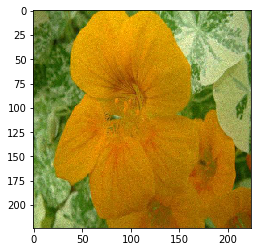

In [134]:
plt.imshow(test[12])

In [135]:
test_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_datagen.fit(X_train)





test_iterator = test_datagen.flow(test, batch_size=64, shuffle=False)
prediction = model.predict_generator(test_iterator,steps = 32)


ValueError: ignored

In [0]:
predict = [np.argmax(prediction[i]) for i in range(2009)]

In [111]:

df_prediction= pd.DataFrame({'category':predict})
df_prediction

,category
0,9
1,40
2,91
3,95
4,51
5,40
6,67
7,56
8,43
9,89


In [112]:
df_prediction.category.value_counts()

46     66
77     65
73     54
89     49
78     48
41     43
83     39
50     36
82     36
95     35
94     35
81     35
51     34
65     34
92     33
58     32
6      32
56     31
88     29
74     28
23     28
96     28
12     27
80     27
60     27
72     26
75     26
17     25
55     24
31     24
       ..
3      12
102    12
79     12
64     12
35     12
40     12
1      11
49     10
85     10
53     10
14     10
21     10
19      9
25      9
34      9
97      8
90      8
86      8
10      8
68      8
9       7
24      7
42      7
27      6
4       6
93      6
11      4
45      4
33      4
16      3
Name: category, Length: 102, dtype: int64

In [0]:
sample = pd.read_csv('../data/sample_submission.csv')

#sample['label'] = prediction
#sample.to_csv('sample_cnn.csv', header=True, index=False)

In [117]:
df_final= sample.iloc[:,[0]]
df_final=pd.concat([df_final,df_prediction],axis=1)
df_final.head()

,image_id,category
0,18540,9
1,18541,40
2,18542,91
3,18543,95
4,18544,51


In [0]:
pd.DataFrame(df_final).to_csv('myprediction_NN.csv',index = False)

In [0]:
from google.colab import files

files.download('myprediction_NN.csv')